In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
df = pd.read_excel('Monsoon_Streamflow_excel.xlsx')
df.drop(columns = ['Unnamed: 0'], inplace = True)
df

,Dates,Year,Month,Day,RF_1,RF_2,RF_3,RF_4,RF_5,RF_6,...,RF_8,RF_10,LRF,Q,Q(t-1),Q(t-2),Q(t-3),Unnamed: 18,Grid Point,weights
0,1977-06-01,1977,6,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.6,0.0,0.0,0.0,NaN,RF_1,0.013302
1,1977-06-02,1977,6,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.6,1.6,0.0,0.0,NaN,RF_2,0.010567
2,1977-06-03,1977,6,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.6,1.6,1.6,0.0,NaN,RF_3,0.086394
3,1977-06-04,1977,6,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.6,1.6,1.6,1.6,NaN,RF_4,0.273084
4,1977-06-05,1977,6,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.6,1.6,1.6,1.6,NaN,RF_5,0.104194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241,2019-09-26,2019,9,26,21.6,27.2,24.3,21.6,7.6,12.0,...,11.9,8.0,18.548222,100.5,199.3,77.1,86.3,NaN,NaN,NaN
5242,2019-09-27,2019,9,27,5.3,4.7,1.8,2.4,2.8,5.9,...,3.2,4.9,5.678861,216.0,100.5,199.3,77.1,NaN,NaN,NaN
5243,2019-09-28,2019,9,28,15.6,10.6,22.4,17.8,22.2,29.1,...,17.0,28.2,24.599051,138.5,216.0,100.5,199.3,NaN,NaN,NaN
5244,2019-09-29,2019,9,29,25.8,25.2,43.5,39.5,50.8,49.7,...,41.9,52.3,39.784959,118.3,138.5,216.0,100.5,NaN,NaN,NaN


In [3]:
part1 = df.drop(df.index[3294:5246])
part2 = df.drop(df.index[0:3294])
print(part1.shape, part2.shape)

(3294, 21) (1952, 21)


In [4]:
part1

,Dates,Year,Month,Day,RF_1,RF_2,RF_3,RF_4,RF_5,RF_6,...,RF_8,RF_10,LRF,Q,Q(t-1),Q(t-2),Q(t-3),Unnamed: 18,Grid Point,weights
0,1977-06-01,1977,6,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.6,0.0,0.0,0.0,NaN,RF_1,0.013302
1,1977-06-02,1977,6,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.6,1.6,0.0,0.0,NaN,RF_2,0.010567
2,1977-06-03,1977,6,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.6,1.6,1.6,0.0,NaN,RF_3,0.086394
3,1977-06-04,1977,6,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.6,1.6,1.6,1.6,NaN,RF_4,0.273084
4,1977-06-05,1977,6,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.6,1.6,1.6,1.6,NaN,RF_5,0.104194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,2003-09-26,2003,9,26,3.0,14.6,33.2,29.6,8.7,11.9,...,8.0,10.3,13.853453,202.2,282.3,218.6,329.3,NaN,NaN,NaN
3290,2003-09-27,2003,9,27,1.1,0.0,5.3,8.5,4.0,6.9,...,1.6,6.1,8.081596,175.1,202.2,282.3,218.6,NaN,NaN,NaN
3291,2003-09-28,2003,9,28,0.0,0.1,0.8,2.8,1.4,3.4,...,0.0,1.9,4.785774,240.0,175.1,202.2,282.3,NaN,NaN,NaN
3292,2003-09-29,2003,9,29,0.2,5.9,18.1,15.8,0.0,0.9,...,2.8,1.3,6.473624,119.3,240.0,175.1,202.2,NaN,NaN,NaN


In [5]:
part2

,Dates,Year,Month,Day,RF_1,RF_2,RF_3,RF_4,RF_5,RF_6,...,RF_8,RF_10,LRF,Q,Q(t-1),Q(t-2),Q(t-3),Unnamed: 18,Grid Point,weights
3294,2004-06-01,2004,6,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.454,0.460,0.460,0.4607,NaN,NaN,NaN
3295,2004-06-02,2004,6,2,0.0,0.6,0.0,0.0,0.0,0.0,...,1.6,0.0,0.222531,0.447,0.454,0.460,0.4600,NaN,NaN,NaN
3296,2004-06-03,2004,6,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.513,0.447,0.454,0.4600,NaN,NaN,NaN
3297,2004-06-04,2004,6,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.512,0.513,0.447,0.4540,NaN,NaN,NaN
3298,2004-06-05,2004,6,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.126467,0.616,0.512,0.513,0.4470,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241,2019-09-26,2019,9,26,21.6,27.2,24.3,21.6,7.6,12.0,...,11.9,8.0,18.548222,100.500,199.300,77.100,86.3000,NaN,NaN,NaN
5242,2019-09-27,2019,9,27,5.3,4.7,1.8,2.4,2.8,5.9,...,3.2,4.9,5.678861,216.000,100.500,199.300,77.1000,NaN,NaN,NaN
5243,2019-09-28,2019,9,28,15.6,10.6,22.4,17.8,22.2,29.1,...,17.0,28.2,24.599051,138.500,216.000,100.500,199.3000,NaN,NaN,NaN
5244,2019-09-29,2019,9,29,25.8,25.2,43.5,39.5,50.8,49.7,...,41.9,52.3,39.784959,118.300,138.500,216.000,100.5000,NaN,NaN,NaN


In [6]:
med1 = part1['Q'].median()
mean1 = part1['Q'].mean()
std1 = part1['Q'].std()
CV1 = (std1/mean1)*100
print(med1, mean1, std1, CV1)

36.165 117.66800315725563 296.15043508188006 251.68306347996258


In [7]:
med2 = part2['Q'].median()
mean2 = part2['Q'].mean()
std2 = part2['Q'].std()
CV2 = (std2/mean2)*100
print(med2, mean2, std2, CV2)

77.778435 132.06284873872798 270.0769731283865 204.5063965435915


In [8]:
zero_count_1 = (part1['Q'] == 0).sum() 
perc_0values1 = (zero_count_1/9496)*100
print(zero_count_1, perc_0values1)

19 0.20008424599831506


In [9]:
zero_count_2 = (part2['Q'] == 0).sum() 
perc_0values2 = (zero_count_2/6210)*100
print(zero_count_2, perc_0values2)

230 3.7037037037037033


# MLR STARTS HERE

In [10]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

[0.51671263] 57.06474352586335 0.14478084686403725 62349.07143892041


<function matplotlib.pyplot.show(close=None, block=None)>

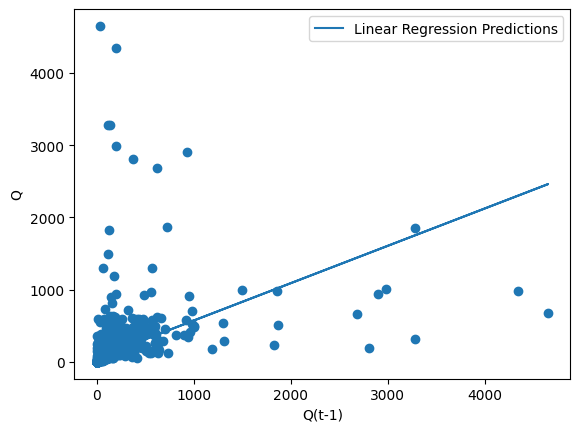

In [11]:
# independent variable = Q(t-1)
model1 = linear_model.LinearRegression()
model1.fit(part1[['Q(t-1)']], part1.Q)
Q_pred1 = model1.predict(part2[['Q(t-1)']])
R2_score1 = r2_score(part2[['Q']], Q_pred1)
MSE1 = mean_squared_error(part2[['Q']], Q_pred1)
print(model1.coef_, model1.intercept_, R2_score1, MSE1)
plt.scatter(part2[['Q(t-1)']], part2[['Q']])
plt.plot(part2[['Q(t-1)']], Q_pred1, label='Linear Regression Predictions')
plt.xlabel('Q(t-1)')
plt.ylabel('Q')
plt.legend()
plt.show

[0.3586471] 75.74499757709684 0.07231683463348981 67632.00255516836


<function matplotlib.pyplot.show(close=None, block=None)>

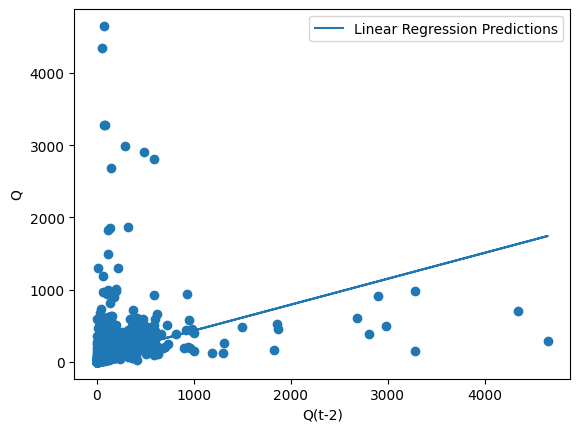

In [12]:
# independent variable = Q(t-2)
model2 = linear_model.LinearRegression()
model2.fit(part1[['Q(t-2)']], part1.Q)
Q = part2[['Q']]
Q_pred2 = model2.predict(part2[['Q(t-2)']])
R2_score2 = r2_score(part2[['Q']], Q_pred2)
MSE2 = mean_squared_error(part2[['Q']], Q_pred2)
print(model2.coef_, model2.intercept_, R2_score2, MSE2)
plt.scatter(part2[['Q(t-2)']], part2[['Q']])
plt.plot(part2[['Q(t-2)']], Q_pred2, label='Linear Regression Predictions')
plt.xlabel('Q(t-2)')
plt.ylabel('Q')
plt.legend()
plt.show

[0.33083419] 79.17068926172297 0.046605961806062135 69506.43326780634


<function matplotlib.pyplot.show(close=None, block=None)>

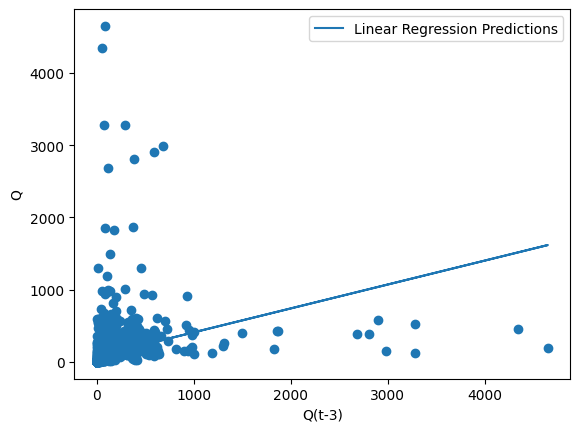

In [13]:
# independent variable = Q(t-3)
model3 = linear_model.LinearRegression()
model3.fit(part1[['Q(t-3)']], part1.Q)
Q = part2[['Q']]
Q_pred3 = model3.predict(part2[['Q(t-3)']])
R2_score3 = r2_score(part2[['Q']], Q_pred3)
MSE3 = mean_squared_error(part2[['Q']], Q_pred3)
print(model3.coef_, model3.intercept_, R2_score3, MSE3)
plt.scatter(part2[['Q(t-3)']], part2[['Q']])
plt.plot(part2[['Q(t-3)']], Q_pred3, label='Linear Regression Predictions')
plt.xlabel('Q(t-3)')
plt.ylabel('Q')
plt.legend()
plt.show

In [14]:
# independent variable = Q(t-1), Q(t-2)
model4 = linear_model.LinearRegression()
model4.fit(part1[['Q(t-1)', 'Q(t-2)']], part1.Q)
Q_pred4 = model4.predict(part2[['Q(t-1)', 'Q(t-2)']])
R2_score4 = r2_score(part2[['Q']], Q_pred4)
MSE4 = mean_squared_error(part2[['Q']], Q_pred4)
print(model4.coef_, model4.intercept_, R2_score4, MSE4)

[0.45209785 0.12488719] 50.04484176044582 0.16560379851261886 60830.990728092125


In [15]:
# independent variable = Q(t-1), Q(t-3)
model5 = linear_model.LinearRegression()
model5.fit(part1[['Q(t-1)', 'Q(t-3)']], part1.Q)
Q_pred5 = model5.predict(part2[['Q(t-1)', 'Q(t-3)']])
R2_score5 = r2_score(part2[['Q']], Q_pred5)
MSE5 = mean_squared_error(part2[['Q']], Q_pred5)
print(model5.coef_, model5.intercept_, R2_score5, MSE5)

[0.45674956 0.16682188] 44.68546010935469 0.16397827273435428 60949.49839072245


In [16]:
# independent variable = Q(t-2), Q(t-3)
model6 = linear_model.LinearRegression()
model6.fit(part1[['Q(t-2)', 'Q(t-3)']], part1.Q)
Q_pred6 = model6.predict(part2[['Q(t-2)', 'Q(t-3)']])
R2_score6 = r2_score(part2[['Q']], Q_pred6)
MSE6 = mean_squared_error(part2[['Q']], Q_pred6)
print(model6.coef_, model6.intercept_, R2_score6, MSE6)

[0.25594699 0.19837892] 64.66558818552184 0.09220829475660708 66181.831492356


In [17]:
# independent variable = Q(t-1), Q(t-2), Q(t-3)
model7 = linear_model.LinearRegression()
model7.fit(part1[['Q(t-1)', 'Q(t-2)', 'Q(t-3)']], part1.Q)
Q_pred7 = model7.predict(part2[['Q(t-1)', 'Q(t-2)', 'Q(t-3)']])
R2_score7 = r2_score(part2[['Q']], Q_pred7)
MSE7 = mean_squared_error(part2[['Q']], Q_pred7)
print(model7.coef_, model7.intercept_, R2_score7, MSE7)

[0.43407558 0.05959342 0.14412356] 43.02008203261961 0.17255412530721093 60324.28268694169
